In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw_sales_data.csv", encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [2]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

Order Date
2015-01-01    14205.707
2015-02-01     4519.892
2015-03-01    55205.797
2015-04-01    27906.855
2015-05-01    23644.303
Freq: MS, Name: Sales, dtype: float64


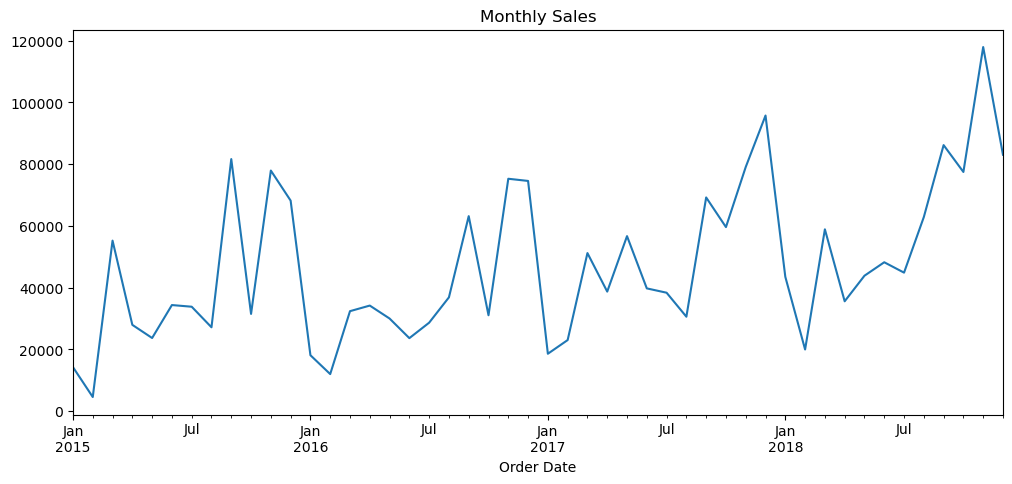

In [3]:
monthly_sales = df.groupby(
    df['Order Date'].dt.to_period('M')
)['Sales'].sum()

monthly_sales = monthly_sales.to_timestamp()
print(monthly_sales.head())

monthly_sales.plot(figsize=(12,5))
plt.title("Monthly Sales")
plt.show()

In [4]:
forecast_df = monthly_sales.reset_index()
forecast_df.columns = ['ds', 'y']

forecast_df.head()

,ds,y
0,2015-01-01,14205.707
1,2015-02-01,4519.892
2,2015-03-01,55205.797
3,2015-04-01,27906.855
4,2015-05-01,23644.303


In [5]:
from prophet import Prophet

model = Prophet()
model.fit(forecast_df)

16:35:34 - cmdstanpy - INFO - Chain [1] start processing
16:35:34 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future = model.make_future_dataframe(periods=12, freq='M')
print(future.tail())

forecast = model.predict(future)

forecast.head()

           ds
55 2019-07-31
56 2019-08-31
57 2019-09-30
58 2019-10-31
59 2019-11-30


c:\Users\tehul\anaconda3\Lib\site-packages\prophet\forecaster.py:1875: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,34111.596950,5010.794709,23114.408249,34111.596950,34111.596950,-19926.363005,-19926.363005,-19926.363005,-19926.363005,-19926.363005,-19926.363005,0.0,0.0,0.0,14185.233945
1,2015-02-01,34551.872259,-4702.535622,13292.409373,34551.872259,34551.872259,-29892.254612,-29892.254612,-29892.254612,-29892.254612,-29892.254612,-29892.254612,0.0,0.0,0.0,4659.617647
2,2015-03-01,34949.540280,42374.131658,60527.951961,34949.540280,34949.540280,16444.859004,16444.859004,16444.859004,16444.859004,16444.859004,16444.859004,0.0,0.0,0.0,51394.399284
3,2015-04-01,35389.815588,12167.532094,30434.795627,35389.815588,35389.815588,-14619.180923,-14619.180923,-14619.180923,-14619.180923,-14619.180923,-14619.180923,0.0,0.0,0.0,20770.634665
4,2015-05-01,35815.888468,13678.316839,31559.625413,35815.888468,35815.888468,-13154.662268,-13154.662268,-13154.662268,-13154.662268,-13154.662268,-13154.662268,0.0,0.0,0.0,22661.226200


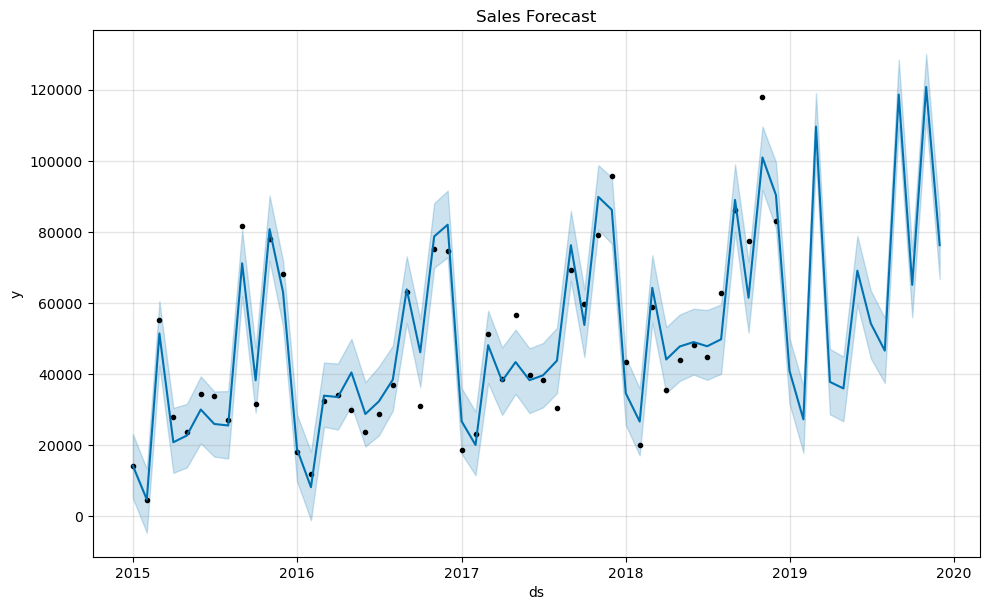

In [7]:
model.plot(forecast)
plt.title("Sales Forecast")
plt.show()

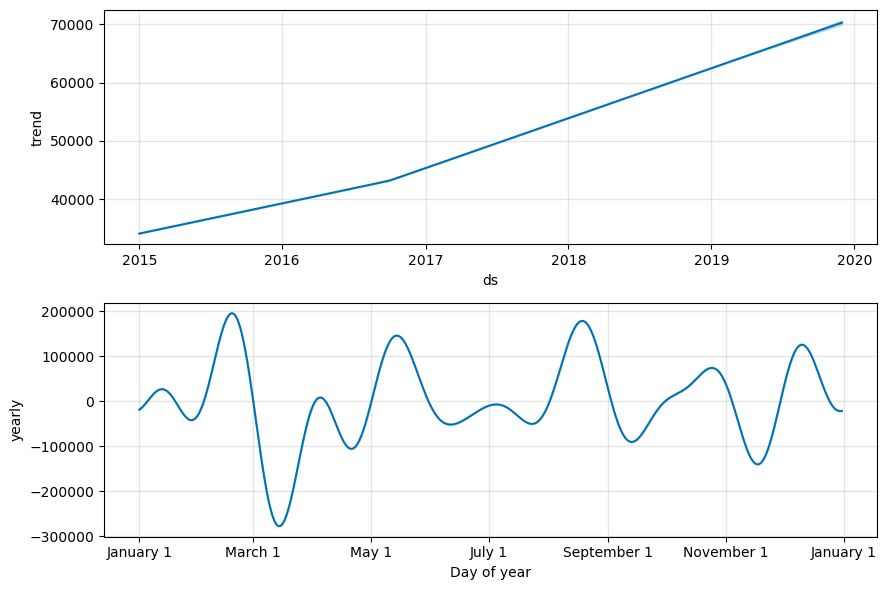

In [8]:
model.plot_components(forecast)
plt.show()

## Evaluate Forecast Accuracy

In [9]:
# Train-test split
train = forecast_df[:-12]   # all except last 12 months
test = forecast_df[-12:]    # last 12 months

In [10]:
from prophet import Prophet

model = Prophet()
model.fit(train)

16:35:35 - cmdstanpy - INFO - Chain [1] start processing
16:35:35 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
forecast.head()

c:\Users\tehul\anaconda3\Lib\site-packages\prophet\forecaster.py:1875: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,34399.787091,4541.605556,20106.386247,34399.787091,34399.787091,-22144.630977,-22144.630977,-22144.630977,-22144.630977,-22144.630977,-22144.630977,0.0,0.0,0.0,12255.156114
1,2015-02-01,34813.116846,-539.602217,14333.544200,34813.116846,34813.116846,-27767.892016,-27767.892016,-27767.892016,-27767.892016,-27767.892016,-27767.892016,0.0,0.0,0.0,7045.224830
2,2015-03-01,35186.446948,46878.999867,61901.397784,35186.446948,35186.446948,18814.231225,18814.231225,18814.231225,18814.231225,18814.231225,18814.231225,0.0,0.0,0.0,54000.678173
3,2015-04-01,35599.776702,17548.841492,32601.506201,35599.776702,35599.776702,-10554.165771,-10554.165771,-10554.165771,-10554.165771,-10554.165771,-10554.165771,0.0,0.0,0.0,25045.610931
4,2015-05-01,35999.773237,17650.161157,32477.295382,35999.773237,35999.773237,-11299.596817,-11299.596817,-11299.596817,-11299.596817,-11299.596817,-11299.596817,0.0,0.0,0.0,24700.176420


In [12]:
from sklearn.metrics import mean_absolute_error

predicted = forecast[['ds', 'yhat']].tail(12)
print(predicted)

mae = mean_absolute_error(test['y'], predicted['yhat'])
print("Mean Absolute Error:", mae)

           ds           yhat
36 2017-12-31   29436.687923
37 2018-01-31   12241.436954
38 2018-02-28   91232.982195
39 2018-03-31   32062.557724
40 2018-04-30   26981.560139
41 2018-05-31   52725.754762
42 2018-06-30   44856.827763
43 2018-07-31   25017.246750
44 2018-08-31  108161.665502
45 2018-09-30   40981.674830
46 2018-10-31   92118.701223
47 2018-11-30   75804.580546
Mean Absolute Error: 17360.044861132927


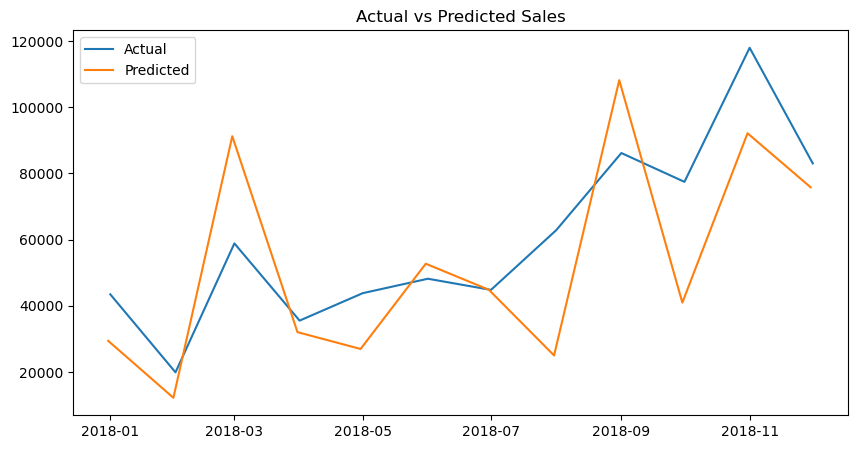

In [13]:
plt.figure(figsize=(10,5))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(predicted['ds'], predicted['yhat'], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.show()

In [16]:
import os

os.makedirs("../outputs", exist_ok=True)
os.makedirs("../models", exist_ok=True)

In [15]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(
    "../outputs/forecast_results.csv",
    index=False
)

In [17]:
import pickle

with open("../models/forecasting_model.pkl", "wb") as f: pickle.dump(model, f)